<a href="https://colab.research.google.com/github/jfdoppler/Intro-Python-DNL/blob/master/analisis_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.integrate import odeint, ode
import matplotlib.pyplot as plt

In [0]:
# Sistema de ecuaciones
def f(t, z):
    x = z[0]
    y = z[1]
    dxdt = x*(3-x-2*y)
    dydt = y*(2-x-y)
    return [dxdt, dydt]


def J(x, y):
    return np.matrix(([3-2*x-2*y, -2*x], [-y, 2-x-2*y]))

<a list of 2 text.Text objects>

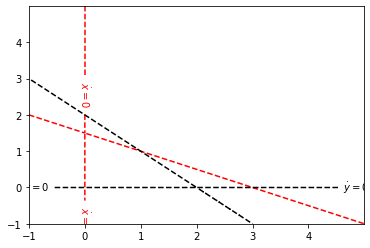

In [62]:
# Nulclinas
XX, YY = np.meshgrid(np.arange(-1, 5, .01), np.arange(-1, 5, .01))
DX, DY = f(0, [XX, YY])

fig, ax = plt.subplots(1)

nulx = ax.contour(XX, YY, DX, levels=[0], colors='red', linestyles='dashed')
ax.clabel(nulx, nulx.levels, fmt='$\dot{x}=0$')
nuly = ax.contour(XX, YY, DY, levels=[0], colors='black', linestyles='dashed')
ax.clabel(nuly, nuly.levels, fmt='$\dot{y}=0$')


--------------
Punto fijo: [0, 0]
Autovalor = 3.0; autovec = [1. 0.]
--------------
Punto fijo: [0, 0]
Autovalor = 2.0; autovec = [0. 1.]
--------------
Punto fijo: [3, 0]
Autovalor = -3.0; autovec = [1. 0.]
--------------
Punto fijo: [3, 0]
Autovalor = -1.0; autovec = [-0.9486833   0.31622777]
--------------
Punto fijo: [0, 2]
Autovalor = -2.0; autovec = [0. 1.]
--------------
Punto fijo: [0, 2]
Autovalor = -1.0; autovec = [ 0.4472136  -0.89442719]
--------------
Punto fijo: [1, 1]
Autovalor = 0.41421356237309515; autovec = [ 0.81649658 -0.57735027]
--------------
Punto fijo: [1, 1]
Autovalor = -2.414213562373095; autovec = [0.81649658 0.57735027]


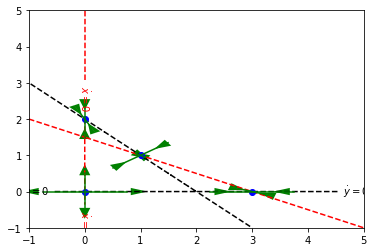

In [63]:
# %% Linealizacion
puntos_fijos = [[0, 0], [3, 0], [0, 2], [1, 1]]
for pf in puntos_fijos:
    xpf = pf[0]
    ypf = pf[1]
    ax.plot(xpf, ypf, 'o', c='b')
    eig_val, eig_vec = np.linalg.eig(J(xpf, ypf))
    if not isinstance(eig_val[0], complex):
        for ix, eig in enumerate(eig_val):
            vec = np.transpose(np.asarray(eig_vec[:, ix]))[0]
            print('--------------\nPunto fijo: {}'.format(pf))
            print('Autovalor = {}; autovec = {}'.format(eig, vec))
            ax.plot([xpf-np.abs(eig)*vec[0]/4, xpf+np.abs(eig)*vec[0]/4],
                    [ypf-np.abs(eig)*vec[1]/4, ypf+np.abs(eig)*vec[1]/4],'g')
            ax.arrow(xpf+np.abs(eig)*vec[0]/4, ypf+np.abs(eig)*vec[1]/4,
                      eig*vec[0]/8, eig*vec[1]/8,
                      shape='full', lw=0, length_includes_head=True,
                      head_width=.2, color='g')
            ax.arrow(xpf-np.abs(eig)*vec[0]/4, ypf-np.abs(eig)*vec[1]/4,
                      -eig*vec[0]/8, -eig*vec[1]/8,
                      shape='full', lw=0, length_includes_head=True,
                      head_width=.2, color='g')
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
fig

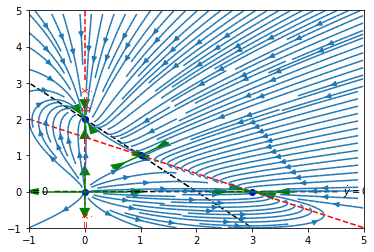

In [64]:
ax.streamplot(XX, YY, DX, DY, density=2, minlength=0.2)
fig